In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import SMOTE

from api.preprocessing import SoilDataPreprocessor

import joblib

sns.set_style("darkgrid")

In [4]:
# Load the preprocessed dataset 

df = pd.read_csv("data/data_for_fertilizer_classification.csv")

# Preview the first 10 rows of the data
df.head(10)

,simpliedtexture(1),ph,n,p,k,o,ca,mg,cu,fe,zn,soilfertilitystatus,croprecommendation1,croprecommendation2,fertilizerrecommendation1,fertilizerrecommendation2
0,SILTY SOIL,4.9,0.14,22.9,0.14,1.1,1.3,2.2,1.2,10.1,5.6,VERY POOR,CASSAVA,COTTON,NPK,NPK
1,LOAMY SOIL,5.7,0.14,28.3,0.27,1.3,1.8,2.1,1.2,12.9,5.2,MODERATELY HEALTHY,BANANA,ALVS,NPK,NPK
2,SILTY LOAM,5.9,0.16,23.1,0.39,2.1,1.6,2.5,1.2,10.1,6.4,MODERATELY HEALTHY,BANANA,ALVS,NPK,NPK
3,LOAMY SOIL,5.7,0.20,29.2,0.47,2.1,2.8,2.2,1.2,12.0,7.4,MODERATELY HEALTHY,BANANA,ALVS,NPK,NPK
4,LOAM,5.7,0.14,28.3,0.28,2.2,3.2,1.4,1.2,12.3,7.0,MODERATELY HEALTHY,BANANA,ALVS,NPK,NPK
5,SILTY SAND,5.7,0.17,29.2,0.72,2.0,2.4,1.9,1.2,11.2,10.3,MODERATELY HEALTHY,SOYBEAN,SESAME,NPK,NPK
6,SILT,5.9,0.18,27.2,0.18,1.9,2.7,2.0,1.4,13.1,5.9,MODERATELY HEALTHY,BEANS,MAIZE,NPK,TSP
7,LOAM,5.7,0.16,22.9,1.22,1.2,2.2,1.5,1.7,12.4,9.4,MODERATELY HEALTHY,BANANA,ALVS,NPK,NPK
8,LOAMY SILT,5.6,0.15,19.4,0.72,1.3,1.9,2.2,1.2,12.6,8.7,POOR,BANANA,ALVS,NPK,NPK
9,LOAM,5.4,0.14,23.2,1.21,1.4,1.1,2.1,1.1,12.9,6.8,POOR,MAIZE,BEANS,NPK,TSP


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 16 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   simpliedtexture(1)         1000 non-null   object 
 1   ph                         1000 non-null   float64
 2   n                          1000 non-null   float64
 3   p                          1000 non-null   float64
 4   k                          1000 non-null   float64
 5   o                          1000 non-null   float64
 6   ca                         1000 non-null   float64
 7   mg                         1000 non-null   float64
 8   cu                         1000 non-null   float64
 9   fe                         1000 non-null   float64
 10  zn                         1000 non-null   float64
 11  soilfertilitystatus        1000 non-null   object 
 12  croprecommendation1        1000 non-null   object 
 13  croprecommendation2        1000 non-null   object

In [6]:
df['fertilizerrecommendation2'].value_counts()

fertilizerrecommendation2
NPK    820
TSP    180
Name: count, dtype: int64

Checking at the distribution of the fertiliser there is need for us to balance the class will use SMOTE for that

In [7]:
df = df.drop(columns=['croprecommendation1', 'croprecommendation2', 'fertilizerrecommendation1'])
df.columns

Index(['simpliedtexture(1)', 'ph', 'n', 'p', 'k', 'o', 'ca', 'mg', 'cu', 'fe',
       'zn', 'soilfertilitystatus', 'fertilizerrecommendation2'],
      dtype='object')

In [8]:
preprocessor = SoilDataPreprocessor()

train_data_processed = preprocessor.fit_transform(
    df, 
    target_column='fertilizerrecommendation2',
    encoding_type='label',
    scaling_type='standard',
    apply_smote=True
)

2025-05-28 21:46:43,087 - SoilDataPreprocessor - INFO - SoilDataPreprocessor initialized
2025-05-28 21:46:43,089 - SoilDataPreprocessor - INFO - ============================================================
2025-05-28 21:46:43,091 - SoilDataPreprocessor - INFO - Starting fit_transform process
2025-05-28 21:46:43,091 - SoilDataPreprocessor - INFO - Parameters - encoding: label, scaling: standard, SMOTE: True
2025-05-28 21:46:43,093 - SoilDataPreprocessor - INFO - Input DataFrame shape: (1000, 13)
2025-05-28 21:46:43,094 - SoilDataPreprocessor - INFO - Target column: fertilizerrecommendation2
2025-05-28 21:46:43,095 - SoilDataPreprocessor - INFO - Target column data type: object
2025-05-28 21:46:43,098 - SoilDataPreprocessor - INFO - Target classes: ['NPK' 'TSP']
2025-05-28 21:46:43,099 - SoilDataPreprocessor - INFO - ----------------------------------------
2025-05-28 21:46:43,099 - SoilDataPreprocessor - INFO - STEP 1: Categorical Encoding
2025-05-28 21:46:43,100 - SoilDataPreprocessor 

In [9]:
# Save the fitted preprocessor
preprocessor.save('models/soil_fertilizer_recommendation_preprocessor.joblib')

2025-05-28 21:47:20,271 - SoilDataPreprocessor - INFO - Saving preprocessor to: models/soil_fertilizer_recommendation_preprocessor.joblib
2025-05-28 21:47:20,280 - SoilDataPreprocessor - INFO - Preprocessor saved successfully


In [7]:
X_balanced, y_balanced = balance_with_smote(df = df, target_column = "fertilizerrecommendation2")

In [11]:
train_data_processed.sample(10)

,simpliedtexture(1),ph,n,p,k,o,ca,mg,cu,fe,zn,soilfertilitystatus,fertilizerrecommendation2
1117,8,0.921205,-0.021353,0.653102,0.793086,-0.186161,-0.160296,-1.128324,-0.999140,-0.761538,0.159508,0,1
385,9,0.579142,-0.021295,1.323028,0.443141,-0.184988,-0.410781,0.816037,0.543536,0.488769,0.807409,0,0
1056,8,0.825717,-0.012204,-0.572091,0.066009,1.298593,1.435148,-1.057388,0.660229,1.017799,1.903590,0,1
27,18,1.267573,0.061405,-0.425646,0.443141,0.799739,1.619741,-1.347370,0.543536,0.488769,-0.244818,0,0
530,19,1.267573,-0.021295,1.538618,0.443141,1.643790,2.358112,2.979444,-0.484915,0.375234,-0.420189,0,0
775,9,-0.109288,-0.007512,-0.904735,0.443141,-0.325663,-0.226188,1.032378,0.543536,0.488769,-0.712475,1,0
1585,8,0.694286,-0.036467,1.336472,0.443141,-0.325663,-0.886649,-1.131029,0.543536,1.014789,1.000441,0,1
1064,14,-0.286791,-0.035511,-0.415884,-0.751839,1.318341,0.290942,0.126324,2.021733,0.598745,0.759764,1,1
704,9,0.062819,-0.007512,-1.168234,0.443141,-0.888364,-0.595373,0.167015,0.543536,-0.646583,1.976551,0,1
1112,8,0.818513,-0.045852,-1.175530,0.443141,-0.270684,0.279495,0.101120,-0.283944,-0.300768,0.004133,0,1


In [12]:
train_data_processed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1640 entries, 0 to 1639
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   simpliedtexture(1)         1640 non-null   int64  
 1   ph                         1640 non-null   float64
 2   n                          1640 non-null   float64
 3   p                          1640 non-null   float64
 4   k                          1640 non-null   float64
 5   o                          1640 non-null   float64
 6   ca                         1640 non-null   float64
 7   mg                         1640 non-null   float64
 8   cu                         1640 non-null   float64
 9   fe                         1640 non-null   float64
 10  zn                         1640 non-null   float64
 11  soilfertilitystatus        1640 non-null   int64  
 12  fertilizerrecommendation2  1640 non-null   int64  
dtypes: float64(10), int64(3)
memory usage: 166.7 KB


In [13]:
train_data_processed['fertilizerrecommendation2'].value_counts()

fertilizerrecommendation2
0    820
1    820
Name: count, dtype: int64

Now we can see the dataset is balanced 

In [14]:
from sklearn.model_selection import train_test_split

X = train_data_processed.drop(columns=['fertilizerrecommendation2'])
y = train_data_processed['fertilizerrecommendation2']

print(f"X columns used: \n", X.columns)
print(f"\ny target columns:", y.name)

# splitting the dataset into train , test and validation
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=43)

X columns used: 
 Index(['simpliedtexture(1)', 'ph', 'n', 'p', 'k', 'o', 'ca', 'mg', 'cu', 'fe',
       'zn', 'soilfertilitystatus'],
      dtype='object')

y target columns: fertilizerrecommendation2


#### 1. Baseline Model

In [15]:
# Model libraries
from sklearn.linear_model import LogisticRegression
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import LinearSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

# model metrics libraries

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, classification_report

In [16]:
# Logistic regression model
log_reg = LogisticRegression(random_state=42)

# Fit the dataset
log_reg.fit(X_train, y_train)

# predict on the Test set
y_pred_log_reg = log_reg.predict(X_test)

In [17]:
# Model Evaluation for Logistic Regression
print("Logistic Regression:")

# Accuracy is the ratio of correctly predicted observation to the total observations.
print(f"Accuracy: {accuracy_score(y_test, y_pred_log_reg):.4f}")

# Precision is the ratio of correctly predicted positive observations to the total predicted positives.
print(f"Precision: {precision_score(y_test, y_pred_log_reg, average='macro'):.4f}")

# Recall (Sensitivity) is the ratio of correctly predicted positive observations to the all observations in actual class.
print(f"Recall: {recall_score(y_test, y_pred_log_reg, average='macro'):.4f}")

# F1 Score is the weighted average of Precision and Recall. Therefore, this score takes both false positives and false negatives into account.
print(f"F1 Score: {f1_score(y_test, y_pred_log_reg, average='macro'):.4f}")

Logistic Regression:
Accuracy: 0.7732
Precision: 0.7990
Recall: 0.7760
F1 Score: 0.7693


In [18]:
print("Classification report:\n", classification_report(y_test, y_pred_log_reg))

Classification report:
               precision    recall  f1-score   support

           0       0.89      0.63      0.74       209
           1       0.71      0.92      0.80       201

    accuracy                           0.77       410
   macro avg       0.80      0.78      0.77       410
weighted avg       0.80      0.77      0.77       410



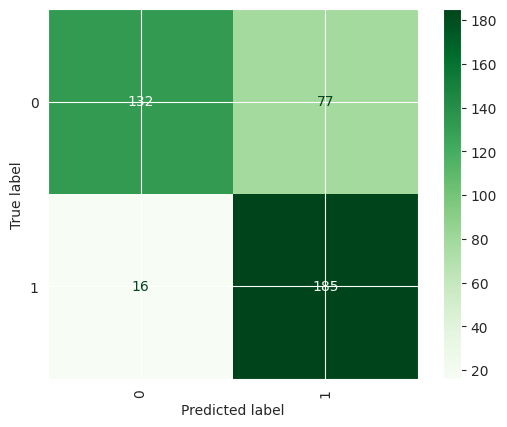

In [19]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_pred_log_reg, labels=log_reg.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=log_reg.classes_)
disp.plot(cmap='Greens')
plt.xticks(rotation=90)

# Saving the plot
plot_path = 'eda_charts/models_evals/fertilize_log_reg_confusion_matrix.png'
plt.savefig(plot_path)

#### 2. Decison Tree Model

In [20]:
# decision trees
from sklearn.tree import DecisionTreeClassifier

# Initialize the Decision Tree Classifier
dtree = DecisionTreeClassifier(random_state=42)

# Fit the model on the training data
dtree.fit(X_train, y_train)

# Predict on the test set
y_pred_tree = dtree.predict(X_test)

In [21]:
print("Decision tree classifier:")

# Accuracy is the proportion of true results (both true positives and true negatives) among the total number of cases examined.
print(f"Accuracy: {accuracy_score(y_test, y_pred_tree):.4f}")

# Precision is the ratio of correctly predicted positive observations to the total predicted positives.
print(f"Precision: {precision_score(y_test, y_pred_tree, average='macro'):.4f}")

# Recall (Sensitivity) is the ratio of correctly predicted positive observations to the all observations in actual class.
print(f"Recall: {recall_score(y_test, y_pred_tree, average='macro'):.4f}")

# F1 Score is the weighted average of Precision and Recall.
print(f"F1 Score: {f1_score(y_test, y_pred_tree, average='macro'):.4f}")

Decision tree classifier:
Accuracy: 0.8122
Precision: 0.8122
Recall: 0.8120
F1 Score: 0.8121


In [22]:
print("Classification report:\n", classification_report(y_test, y_pred_tree))

Classification report:
               precision    recall  f1-score   support

           0       0.81      0.82      0.82       209
           1       0.81      0.80      0.81       201

    accuracy                           0.81       410
   macro avg       0.81      0.81      0.81       410
weighted avg       0.81      0.81      0.81       410



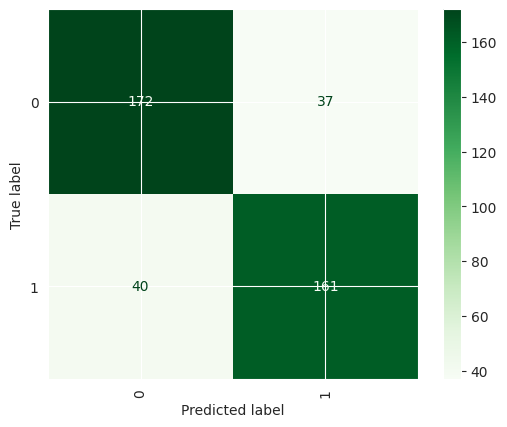

In [23]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_pred_tree, labels=dtree.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=dtree.classes_)
disp.plot(cmap='Greens')
plt.xticks(rotation=90)

# Saving the plot
plot_path = 'eda_charts/models_evals/fertiliser_decision_tree_confusion_matrix.png'
plt.savefig(plot_path)

plt.show()

In [24]:
# Save the model to a file
joblib.dump(dtree, 'models/Fertilizer_decisionTree_Classifier_model.joblib')

print("Decision Tree Classifier models saved to: models/Fertiliser_decisionTree_Classifier_model")

Decision Tree Classifier models saved to: models/Fertiliser_decisionTree_Classifier_model


#### 3. Random Forest

In [25]:
# Random forest classifier

# Initialize the Random Forest Classifier
rf = RandomForestClassifier(random_state=142)

# Fit the model
rf.fit(X_train, y_train)

# Make predictions on test set
y_pred_rf = rf.predict(X_test)

In [26]:
# Model Evaluation for Random Forest
print("\nRandom Forest:")

# Accuracy is the proportion of true results (both true positives and true negatives) among the total number of cases examined.
print(f"Accuracy: {accuracy_score(y_test, y_pred_rf)}")

# Precision is the ratio of correctly predicted positive observations to the total predicted positives.
print(f"Precision: {precision_score(y_test, y_pred_rf, average='macro'):.4f}")

# Recall (Sensitivity) is the ratio of correctly predicted positive observations to the all observations in actual class.
print(f"Recall: {recall_score(y_test, y_pred_rf, average='macro'):.4f}")

# F1 Score is the weighted average of Precision and Recall. It tries to find the balance between precision and recall.
print(f"F1 Score: {f1_score(y_test, y_pred_rf, average='macro'):.4f}")


Random Forest:
Accuracy: 0.875609756097561
Precision: 0.8768
Recall: 0.8762
F1 Score: 0.8756


In [27]:
print("Classification report:\n", classification_report(y_test, y_pred_rf))

Classification report:
               precision    recall  f1-score   support

           0       0.90      0.85      0.87       209
           1       0.85      0.91      0.88       201

    accuracy                           0.88       410
   macro avg       0.88      0.88      0.88       410
weighted avg       0.88      0.88      0.88       410



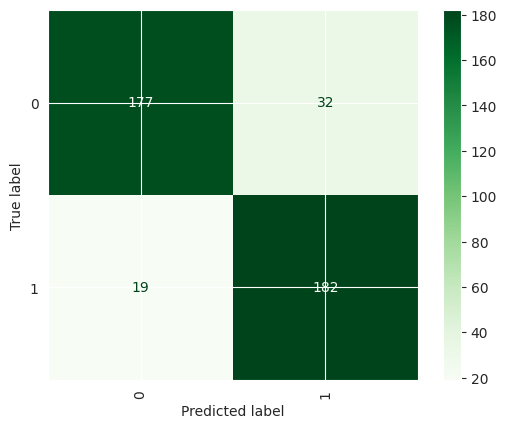

In [28]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_pred_rf, labels=rf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=rf.classes_)
disp.plot(cmap='Greens')
plt.xticks(rotation=90)

# Saving the plot
plot_path = 'eda_charts/models_evals/Fertiliser_random_forest_confusion_matrix.png'
plt.savefig(plot_path)

plt.show()

In [29]:
# Save the model to a file
joblib.dump(rf, "models/Fertilizer_randomForest_Classifier_Model.joblib")

print("Random Forest Classifier saved to: models/Fertiliser_randomForest_Classifier")

Random Forest Classifier saved to: models/Fertiliser_randomForest_Classifier


#### 4. Gradient Boosting Machine

In [30]:
from xgboost import XGBClassifier

In [31]:
# xg boost

# initialise the model
xgb = XGBClassifier(random_state=142)

# Fit the model on training data
xgb.fit(X_train, y_train)

# predict the test set
y_pred_xgb = xgb.predict(X_test)

In [32]:
# Model Evaluation for XGBoost
print("\nGradient Boosting Machine (XGBoost):")

print(f"Accuracy: {accuracy_score(y_test, y_pred_xgb):.4f}")

print(f"Precision: {precision_score(y_test, y_pred_xgb, average='macro'):.4f}")

print(f"Recall: {recall_score(y_test, y_pred_xgb, average='macro'):.4f}")

print(f"F1 Score: {f1_score(y_test, y_pred_xgb, average='macro'):.4f}")


Gradient Boosting Machine (XGBoost):
Accuracy: 0.8756
Precision: 0.8761
Recall: 0.8760
F1 Score: 0.8756


In [33]:
print("Classification report:\n", classification_report(y_test, y_pred_xgb))

Classification report:
               precision    recall  f1-score   support

           0       0.90      0.86      0.88       209
           1       0.86      0.90      0.88       201

    accuracy                           0.88       410
   macro avg       0.88      0.88      0.88       410
weighted avg       0.88      0.88      0.88       410



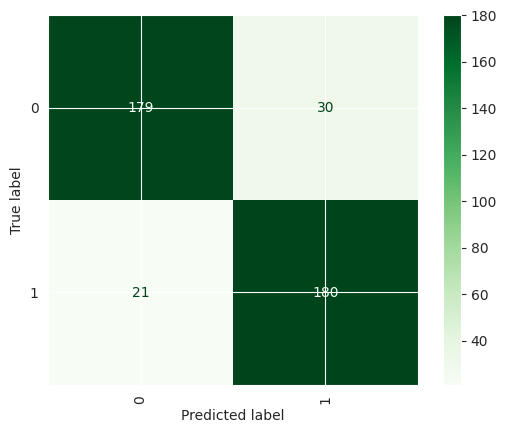

In [34]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_pred_xgb, labels=xgb.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=xgb.classes_)
disp.plot(cmap='Greens')
plt.xticks(rotation=90)

# Saving the plot
plot_path = 'eda_charts/models_evals/Fertiliser_xgboost_confusion_matrix.png'
plt.savefig(plot_path)

plt.show()

In [35]:
# Save the model to a file
joblib.dump(rf, "models/Fertilizers_xgb_Classifier_Model.joblib")

print("Gradient Boosting Classifier saved to: models/Fertiliser_xgboost_Classifier")

Gradient Boosting Classifier saved to: models/Fertiliser_xgboost_Classifier
